<a href="https://colab.research.google.com/github/DCNiloy/DCNiloy/blob/main/weather_dip_chowdhury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [64]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


In [65]:
!pip install pyinputplus matplotlib requests

In [67]:
import pyinputplus as pyip
import matplotlib.pyplot as plt
import requests
import os


In [69]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 6548411d0f3e496cb7753a979ad8f31f.4VD4atPCEZbIwi7h4H_tsz2T


## 📦 Setup and Configuration
Import required packages and setup environment.

In [81]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

## 🌤️ Weather Data Functions

In [82]:
def get_weather_data(location="Perth", forecast_days=5):
    """
    Retrieve weather data from wttr.in
    """
    try:
        url = f"https://wttr.in/{location}?format=j1"
        response = requests.get(url)
        data = response.json()
        return data
    except Exception as e:
        print(f"Error retrieving data: {e}")
        return None

In [83]:
weather_data = get_weather_data()
print(weather_data.keys())

dict_keys(['current_condition', 'nearest_area', 'request', 'weather'])


## 📊 Visualisation Functions

In [84]:
def create_temperature_visualisation(weather_data, output_type='display'):
    days = weather_data['weather']
    dates = [day['date'] for day in days]
    temps = [int(day['avgtempC']) for day in days]

    plt.figure(figsize=(8, 4))
    plt.plot(dates, temps, marker='o')
    plt.title("Average Temperature Over Days in Perth")
    plt.xlabel("Date")
    plt.ylabel("Avg Temp (°C)")
    plt.grid(True)
    if output_type == 'display':
        plt.show()

In [86]:
def create_precipitation_visualisation(weather_data, output_type='display'):
    days = weather_data['weather']
    dates = [day['date'] for day in days]
    rain = [int(day['hourly'][0]['chanceofrain']) for day in days]

    plt.figure(figsize=(8, 4))
    plt.bar(dates, rain)
    plt.title("Chance of Rain in Perth")
    plt.xlabel("Date")
    plt.ylabel("Chance of Rain (%)")
    plt.grid(True)
    if output_type == 'display':
        plt.show()


In [88]:
def parse_weather_question(question):
    question = question.lower()
    if "temperature" in question:
        return {"attribute": "temperature"}
    elif "rain" in question or "precipitation" in question:
        return {"attribute": "rain"}
    else:
        return {"attribute": "unknown"}

In [89]:
def generate_weather_response(parsed_question, weather_data):
    if parsed_question['attribute'] == "temperature":
        today = weather_data['weather'][0]
        return f"Today in Perth, the average temperature is {today['avgtempC']}°C."
    elif parsed_question['attribute'] == "rain":
        today = weather_data['weather'][0]
        rain = today['hourly'][0]['chanceofrain']
        return f"Today in Perth, the chance of rain is {rain}%."
    else:
        return "I'm not sure how to answer that. Please ask about temperature or rain."

In [91]:
def weather_menu():
    location = "Perth"
    data = get_weather_data(location)

    while True:
        choice = pyip.inputMenu(['Get Weather Info', 'Ask a Question', 'Show Temperature Graph', 'Show Rain Graph', 'Exit'], numbered=True)

        if choice == 'Get Weather Info':
            today = data['weather'][0]
            print(f"Today's Avg Temp in Perth: {today['avgtempC']}°C")
            print(f"Chance of Rain: {today['hourly'][0]['chanceofrain']}%")

        elif choice == 'Ask a Question':
            q = input("Ask your weather question: ")
            parsed = parse_weather_question(q)
            print(generate_weather_response(parsed, data))

        elif choice == 'Show Temperature Graph':
            create_temperature_visualisation(data)

        elif choice == 'Show Rain Graph':
            create_precipitation_visualisation(data)

        elif choice == 'Exit':
            break


Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
3


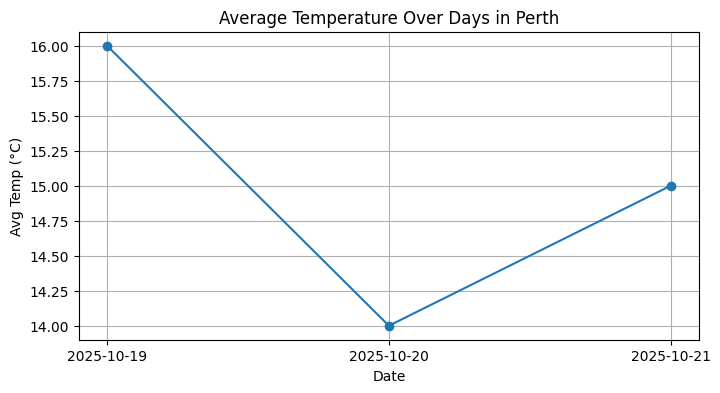

Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
4


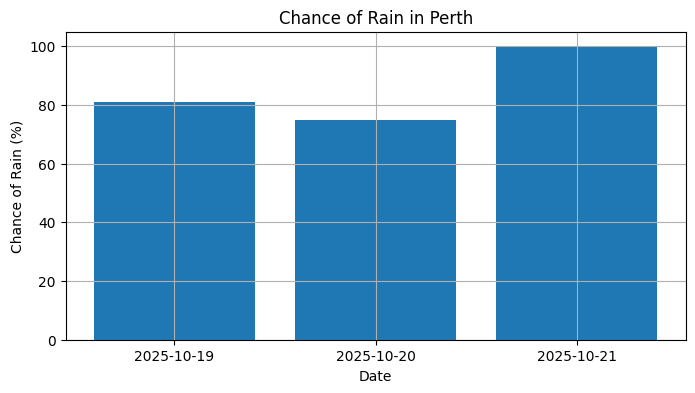

Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
5


In [93]:
weather_menu()

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.